# Practicals in Seismology, winter semester 2024/25

_____

### Week 3, 07 November 2024  
### Topics: Seismogram spectral analysis
### Responsible: Dr. Yajian Gao

-------

**In this week's practicals you will work with simple obspy functions, learn and/or recapulate and practice**

* how to read earthquake data
* how to plot earthquake data, and how to distinguish between local, regional and teleseismic events
* how to filter earthquake data, and which filters are useful for local, regional and teleseismic events
* how to compute spectrograms and how to plot them
---

**Task 1: Local earthquake**

During the first practical (27 October) you already used simple obspy functions, read in a data stream and plotted the data. Do you still remember how to import obspy and its read-function? 

In [1]:
import obspy
from obspy import read 

During the practicals on 21 October, you read in the data, which was stored in a folder "Files". Today, you can do that in a very similar way. There is also a "Files" folder available for today's practicals. Please take a look at those files: The number after the D. gives you the year, the number after the year gives you the Julian Day. Julian days are a simple continuous count, starting on 1 January of each year with 1, running to 365 (or 366 in leap years). Use the linux command <code>ll</code> in a terminal to list all files in the folder.

Now, read in the three files from 14 July 2018 (Julian Day 195).

In [47]:
# read in the data to stream
st=read('Files/*2018.195')

In [3]:
print(st)

3 Trace(s) in Stream:
GI.STG8..HHE | 2018-07-14T00:00:03.260000Z - 2018-07-15T00:00:00.510000Z | 100.0 Hz, 8639726 samples
GI.STG8..HHN | 2018-07-14T00:00:00.410000Z - 2018-07-15T00:00:01.830000Z | 100.0 Hz, 8640143 samples
GI.STG8..HHZ | 2018-07-14T00:00:00.000000Z - 2018-07-15T00:00:00.570000Z | 100.0 Hz, 8640058 samples


Print the stream using <code>print(st)</code>, and also print its length using <code>len(st)</code>

In [48]:
#print stream
#print length of stream
print(len(st))

3


What do you think are the three traces in your stream? How do they differ? What do they have in common? How long is each trace approximately?

Check your considerations by printing the station, channel, starttime and first data sample of the first trace in st! Remember that the first trace is indexed with a "0". Then, check the remaining traces.

In [49]:
print(st[0].stats.network)
print(st[0].stats.station) # prints the first trace's station name
print(st[0].stats.channel)# now print the channel of the first trace
print(st[0].stats.starttime)# print the starttime of the first trace
print(st[0].data[0])# print the first data point of the first trace
# do the same for the two remaining traces

GI
STG8
HHE
2018-07-14T00:00:03.260000Z
1676


In [50]:
print(st[1].stats.station) # prints the first trace's station name
print(st[1].stats.channel)# now print the channel of the first trace
print(st[1].stats.starttime)# print the starttime of the first trace
print(st[1].data[0])

STG8
HHN
2018-07-14T00:00:00.410000Z
2328


In [51]:
print(st[2].stats.station) # prints the first trace's station name
print(st[2].stats.channel)# now print the channel of the first trace
print(st[2].stats.starttime)# print the starttime of the first trace
print(st[2].data[0])

STG8
HHZ
2018-07-14T00:00:00.000000Z
1700


Assign the vertical component (which trace in stream?) to the variable tr and print it to check if everything went well.

In [52]:
# assign vertical component from stream to new variable tr
tr=st.select(component='*Z')[0]
# print the trace
print(tr)

GI.STG8..HHZ | 2018-07-14T00:00:00.000000Z - 2018-07-15T00:00:00.570000Z | 100.0 Hz, 8640058 samples


Now plot this trace using the command <code>tr.plot()</code>.

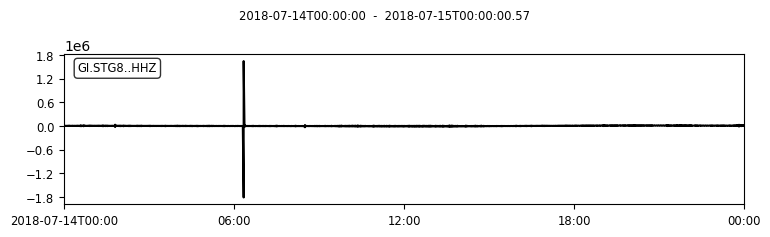

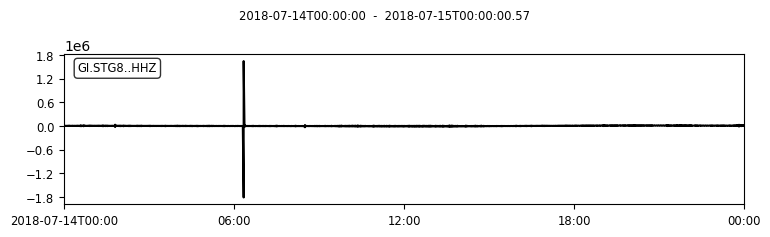

In [53]:
# plot the trace
tr.plot()

Check that you really displayed the vertical component of data for station STG8, and that your data has a length of 24 hours. Can you spot an earthquake? At what time (approximately) did the signal arrive at station STG8?

Now use the dayplot option to display your data. Insert <code>type='dayplot'</code> in the empty brackets from the last command.

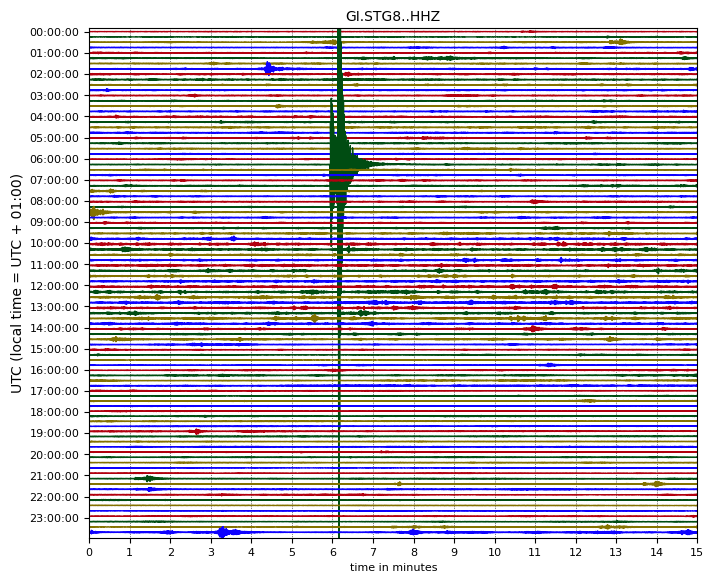

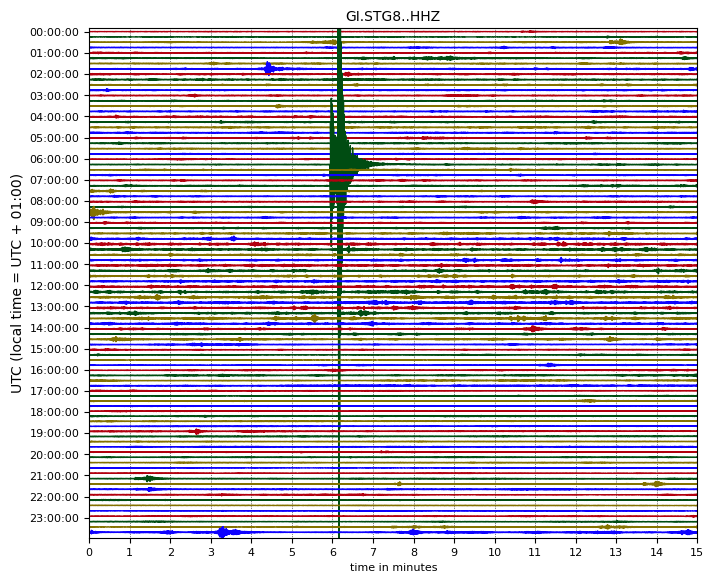

In [54]:
# plot the trace as dayplot
tr.plot(type='dayplot')

Can you still spot the earthquake? What are the advantages of the better time resolution in this plot, as compared to the first one? Can you even distinguish even seismic phases here? Can you see other seismic signals which were not visible in the first plot?

You might want to cut out your signal now. You did that already during the first practicals on 21 October: Import UTCDateTime from obspy first.

In [55]:
from obspy import UTCDateTime 

It might be helpful to copy your trace before you trim it, in case you want to go back to the full trace. The copied trace should be called t2. 

Then define start time as <code>t1=UTCDateTime(y,m,d,h,m,s)</code> and end time <code>t2=...</code>, and use the <code>trim</code> command applied to the trace. Then plot the trimmed trace. 

You can do this step several times in order to find the exact piece you want.

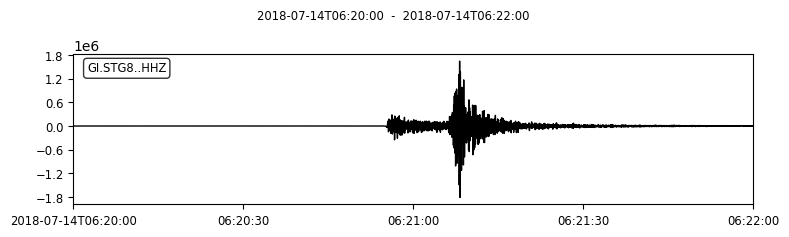

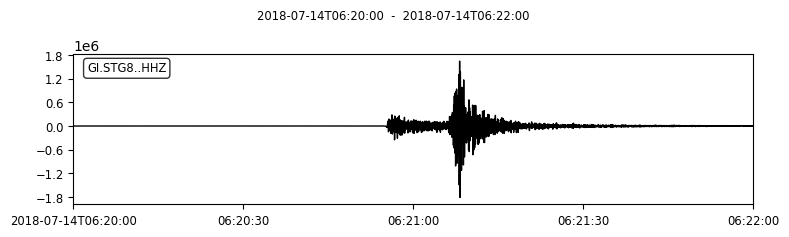

In [56]:
# copy trace to tr2
tr2=tr.copy()
t1=UTCDateTime(2018,7,14,6,20,0)
t2=UTCDateTime(2018,7,14,6,22,0)
# use tr2.trim(t1,t2) to trim the trace
tr2.trim(t1,t2)
# now plot tr2
tr2.plot()

Plot all three components now! You can simply do that using st instead of tr. Copy st first (to st2), then use start and end time to trim your stream and plot it.

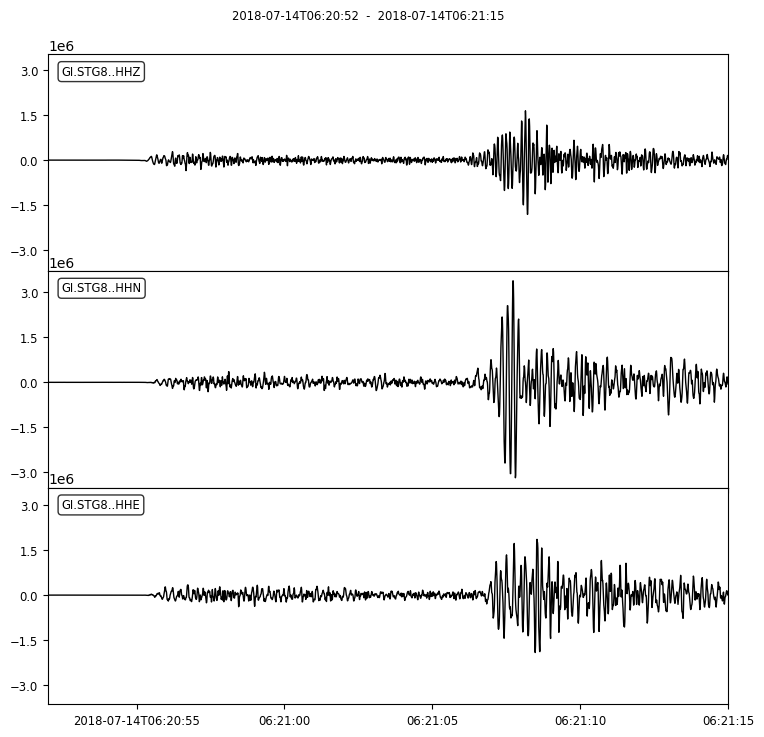

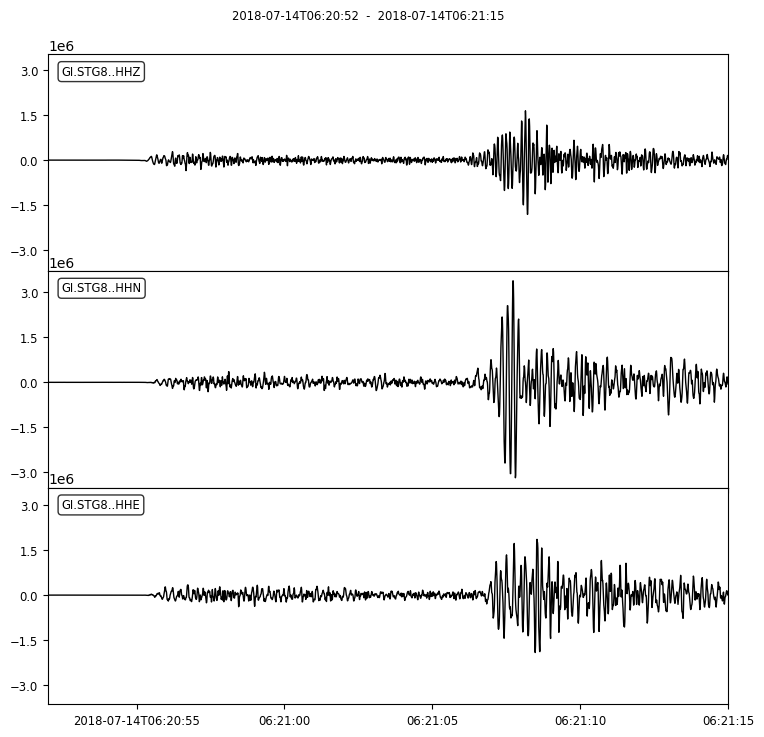

In [57]:
# copy stream to st2
st2=st.copy()
t1=UTCDateTime(2018,7,14,6,20,52)
t2=UTCDateTime(2018,7,14,6,21,15)
# use st2.trim(t1,t2) to trim the stream
st2.trim(t1,t2)
# now plot st2
st2.plot()

Can you pick P and S phases? You might need to trim the stream even shorter for determining the onsets. Which components would you use for picking the P phase, which component would you use for picking the S phase? Can you assess the approximate hypocentral distance $s$ of this earthquake using S-P times? (use $s = \Delta t \cdot$ 1.4 $\cdot$ 6 km/s as a rule-of-thumb assuming 6 km/s of Vp and 1.7 p/s ratio,).

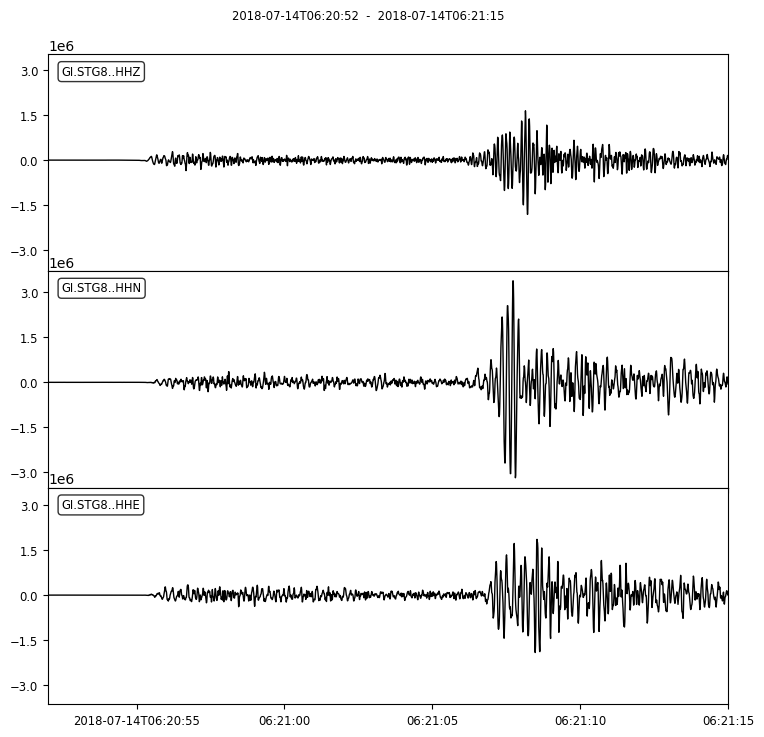

P wave arrival time is around 20:55 whereas the S wave is 21:07 thus the s-p travel time difference is around 12 seconds
hypocentral distance is  100.79999999999998 km


In [58]:
# copy stream to st2
st2=st.copy()
t1=UTCDateTime(2018,7,14,6,20,52)
t2=UTCDateTime(2018,7,14,6,21,15)
# use st2.trim(t1,t2) to trim the stream
st2.trim(t1,t2)
# now plot st2
st2.plot()
print('P wave arrival time is around 20:55 whereas the S wave is 21:07 thus the s-p travel time difference is around 12 seconds')
distance=12*1.4*6
print('hypocentral distance is ',distance,'km' )

This event was recorded at Santiaguito volcano (Guatemala), but is not connected to volcanic activity. It is a magnitude 4.1 subduction zone earthquake with an epicentral distance of 11 km from the station, and a hypocentral depth of 99.53 km. What is the hypocentral distance for this event?

In [59]:
import numpy as np
hypo=np.sqrt(np.square(11)+np.square(99.53))
print(hypo)

100.13601200367428


So, obviously, the hypocentral distance is smaller than what we computed with our rule-of-thumb. Would it make sense to use a different value for the average crustal velocity? Higher or lower, and why? What is the average crustal velocity for a hypocentral depth of 99 km, and your $\Delta t$?

__________________________________________

Now let's look at the spectral content of the data. Do you have an idea about the frequency content of this signal? A quick overview gives us the <code>spectrogram</code> function below which can be applied to one component of the data, e.g. the trimmed trace (tr2), or even the full trimmed stream (st2). Theoretically, you could also apply it to the full trace (tr) or full stream (st), but this will consume a lot of computational power as the data set is large.

Simply run the next cell without making any changes to it.

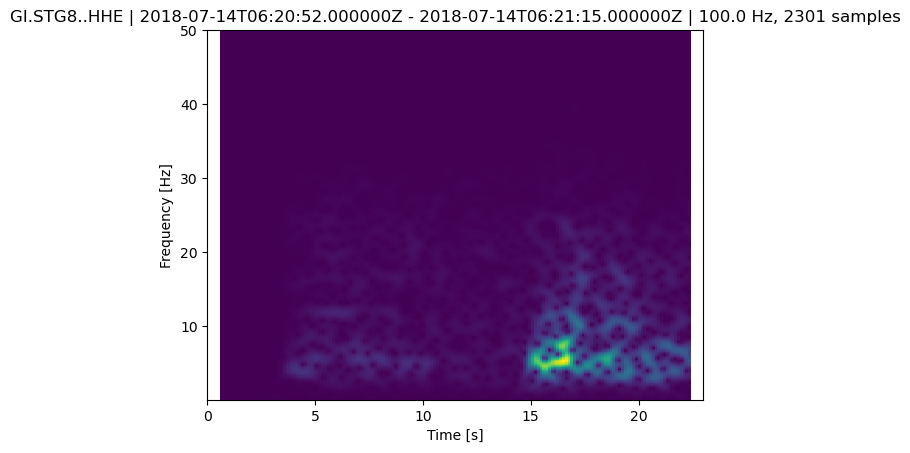

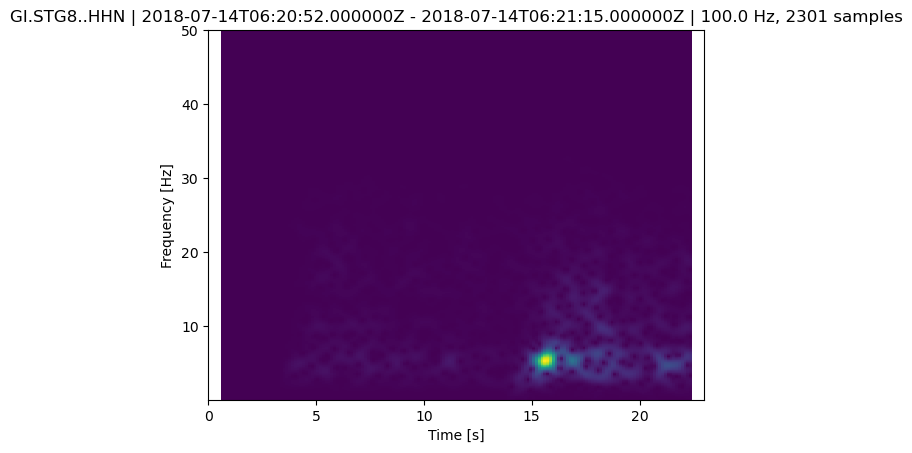

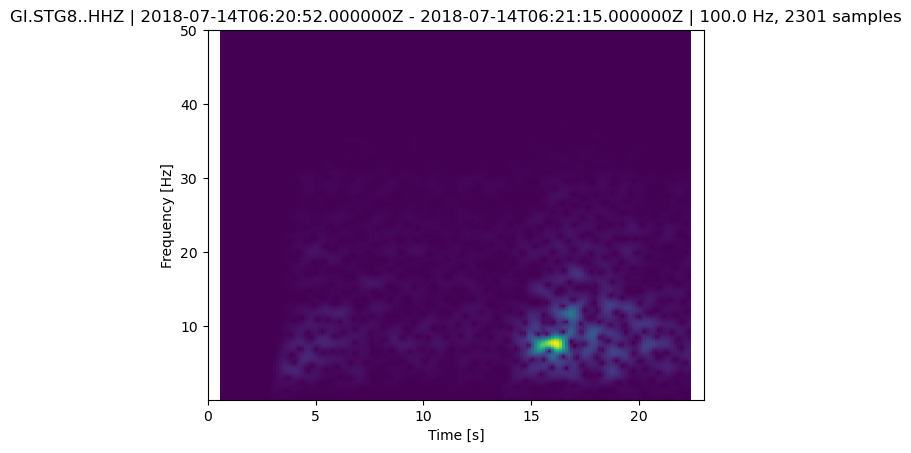

[None, None, None]

In [60]:
st2.spectrogram(log=False)

Once you have arrived at this point, wait for all the others. Before we continue we will compare what everybody did. Please write into the chat that you arrived at this point.

This spectrogram gives us a vague idea, but from now on we will produce "better" plots using the matplotlib library. You have already used this library in the second Seismology practicals. 

We will also need numpy during the next steps. 

Import both, matplotlib and numpy, first.

In [61]:
import numpy
import matplotlib.pyplot as plt

Now we can use the function <code>specgram</code>. It requires several more values than the simple function <code>spectrogram</code>. We can individually adjust them. The man page says:
    
matplotlib.pyplot.specgram(x, NFFT=None, Fs=None, Fc=None, detrend=None, window=None, noverlap=None, cmap=None, xextent=None, pad_to=None, sides=None, scale_by_freq=None, mode=None, scale=None, vmin=None, vmax=None, *, data=None, **kwargs)

x is the data (you might want to set this to tr2), NFFT is the number of points in the FFT, FS is the sampling frequency, noverlap gives the number of overlapping samples, vmin and vmax are the values which are used for brightest and darkest color. Try out different values and see how your spectrogram varies.

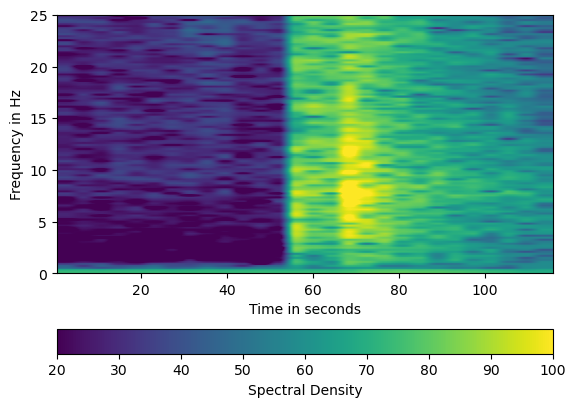

In [62]:
NFFT= 512 #number of points in FFT, should be 2^n for integer n.
Fs=1.0/tr.stats.delta # we compute this from dt, given as meta information of the trace
noverlap=100 # must be smaller than NFFT
vmin=20 # value assigned to dark purple
vmax=100 # value assigned to bright yellow
fig = plt.figure(1) # assigna a figure's name, in order to use it for the colorbar
Pxx, freqs, bins, im=plt.specgram(tr2, NFFT=NFFT, Fs=Fs, noverlap=noverlap,vmin=vmin,vmax=vmax) # this is the actual specgram function
plt.ylim(0,25) # change y-axis limits
plt.xlabel('Time in seconds') # add labels
plt.ylabel('Frequency in Hz') # add labels
cbar = fig.colorbar(im, orientation='horizontal') # add colorbar        
cbar.set_label('Spectral Density') # add colorbar label
plt.show() # show plot

Here, we only plotted the frequency axis from 0 to 25 Hz. Take a look at the full available frequency axis. What would be the maximum frequency in the data (Nyquist frequency)? How is it defined? You might want to compute and print it, and then change your y-axis limits in the spectrogram above accordingly.

In signal processing, the Nyquist frequency (or folding frequency), named after Harry Nyquist, is a characteristic of a sampler, which converts a continuous function or signal into a discrete sequence. In units of cycles per second (Hz), its value is one-half of the sampling rate (samples per second)

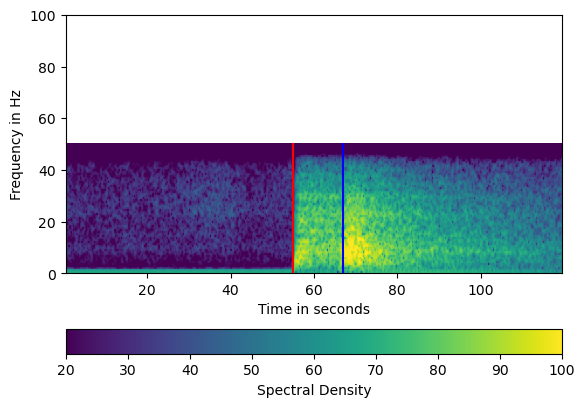

In [63]:
NFFT= 128 #number of points in FFT, should be 2^n for integer n.
Fs=1.0/tr.stats.delta # we compute this from dt, given as meta information of the trace
noverlap=100 # must be smaller than NFFT
vmin=20 # value assigned to dark purple
vmax=100 # value assigned to bright yellow
fig = plt.figure(1) # assigna a figure's name, in order to use it for the colorbar
Pxx, freqs, bins, im=plt.specgram(tr2.data, NFFT=NFFT, Fs=Fs, noverlap=noverlap,vmin=vmin,vmax=vmax) # this is the actual specgram function
plt.ylim(0,100) # change y-axis limits
plt.plot(np.array([55,55]),np.array([0,50]),'r')
plt.plot(np.array([67,67]),np.array([0,50]),'b')
plt.xlabel('Time in seconds') # add labels
plt.ylabel('Frequency in Hz') # add labels
cbar = fig.colorbar(im, orientation='horizontal') # add colorbar        
cbar.set_label('Spectral Density') # add colorbar label
plt.show() # show plot

In [64]:
fnu=100/2
print(fnu)

50.0


As next step we will filter the data. First copy the trimmed trace (tr2) to trace tr3. Then apply a bandpass filter to tr3. Which filters would you apply for a better determination of P and S phases? You can find that out from the spectrogram above. 

In [65]:
# copy the trimmed tr2 to tr3
tr3=tr2.copy()
tr3.filter('bandpass',freqmin=0.1,freqmax=10.0, zerophase= 'True') # application of bandpass filter

GI.STG8..HHZ | 2018-07-14T06:20:00.000000Z - 2018-07-14T06:22:00.000000Z | 100.0 Hz, 12001 samples

Plot both traces (unfiltered trimmed trace tr2 and filtered trimmed trace tr3) now. Create a time axis t (in seconds) first. Label x and y axes. What is shown on the y-axis?

Try out different values for freqmin and freqmax now! Check how the amplitude of the filtered trace changes while you do that.

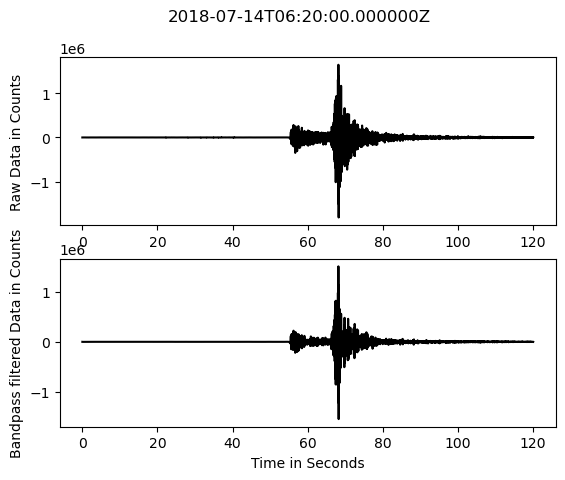

In [66]:
t = np.arange(0, tr2.stats.npts / tr2.stats.sampling_rate, tr2.stats.delta) # creates time axis
plt.subplot(211)
plt.plot(t, tr2, 'k')
plt.ylabel('Raw Data in Counts')
plt.subplot(212)
plt.plot(t, tr3, 'k')
plt.ylabel('Bandpass filtered Data in Counts')
plt.xlabel('Time in Seconds')
plt.suptitle(tr3.stats.starttime)
plt.show()

So far, we've only looked at velocity amplitudes in counts. Within the passband, we can simply multiply counts by an amplitude conversion factor, which depends on the seismic instruments used. For the seismic instruments in this exercises, the conversion factor is $5 \cdot 10^{-12}$. Multiplying the data by this factor will give you m/s as a unit.

In [67]:
tr2

GI.STG8..HHZ | 2018-07-14T06:20:00.000000Z - 2018-07-14T06:22:00.000000Z | 100.0 Hz, 12001 samples

In [68]:
# define factor here
factor=5*1e-12
tr2.data=tr2.data*factor # multiplies data values of tr2 by factor
# multiply filtered data values tr3 by factor
factor=5*1e-12
tr3.data=tr3.data*factor # multiplies data values of tr2 by factor

Now plot the data again. Remember to change the label of the y-axis accordingly.

In [25]:
tr2.times()

array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 1.1998e+02, 1.1999e+02,
       1.2000e+02])

In [26]:
t

array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 1.1998e+02, 1.1999e+02,
       1.2000e+02])

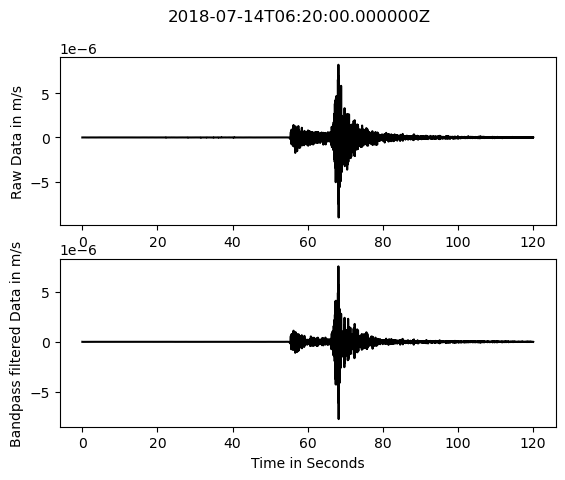

In [69]:
# plot both, tr2 and tr3, again, using m/s on the y-axis
t = np.arange(0, tr2.stats.npts / tr2.stats.sampling_rate, tr2.stats.delta) # creates time axis
#or t=tr2.times()
plt.subplot(211)
plt.plot(t, tr2, 'k')
plt.ylabel('Raw Data in m/s')
plt.subplot(212)
plt.plot(t, tr3, 'k')
plt.ylabel('Bandpass filtered Data in m/s')
plt.xlabel('Time in Seconds')
plt.suptitle(tr3.stats.starttime)
plt.show()


**Task 2: Regional earthquake**

You can now apply the same analysis to the seismic records from 21 August 2018 (Julian day 233). Read the data into a stream first. Print the stream, choose the vertical componet and plot it as 24h-long seismogram. Use the dayplot option as well.

3 Trace(s) in Stream:
GI.STG8..HHE | 2018-08-21T00:00:03.780000Z - 2018-08-22T00:00:02.240000Z | 100.0 Hz, 8639847 samples
GI.STG8..HHN | 2018-08-21T00:00:01.630000Z - 2018-08-22T00:00:02.640000Z | 100.0 Hz, 8640102 samples
GI.STG8..HHZ | 2018-08-21T00:00:02.630000Z - 2018-08-22T00:00:01.030000Z | 100.0 Hz, 8639841 samples


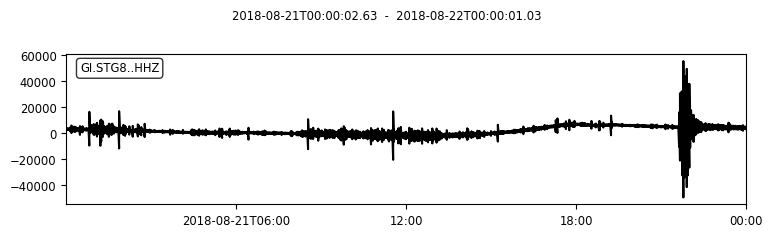

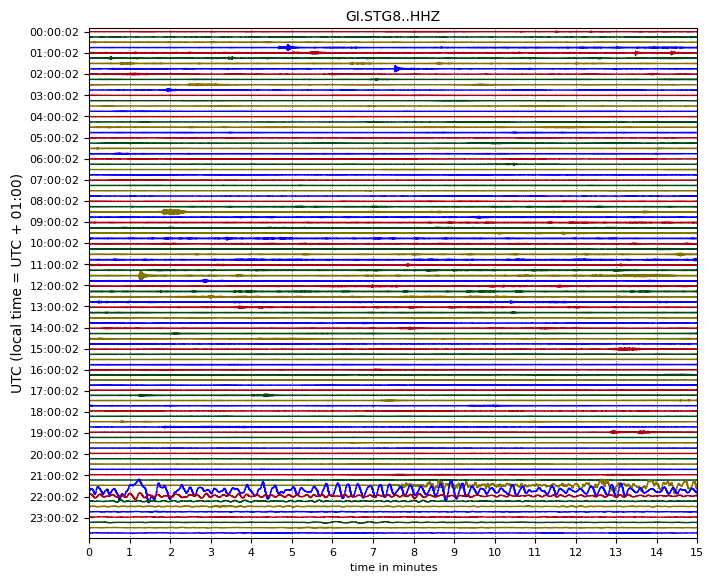

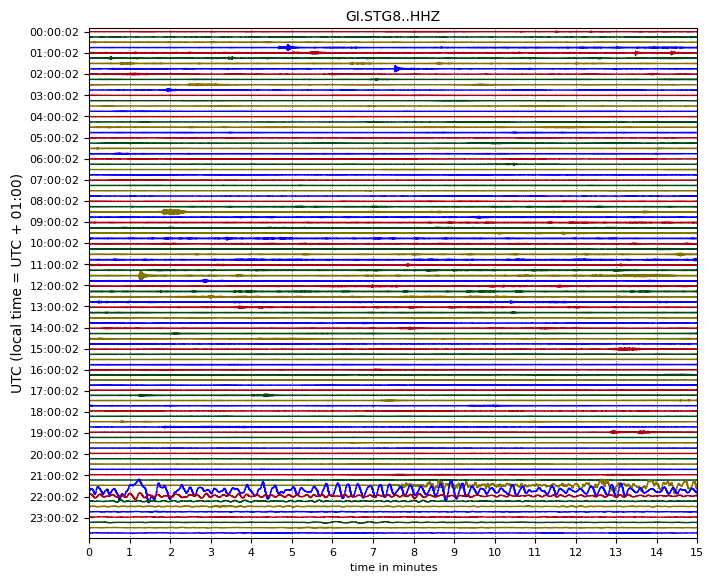

In [70]:
# read data to stream
st=read('Files/*2018.233')
print(st)
tr=st.select(component='*Z')[0]
tr.plot()
tr.plot(type='dayplot')
# print stream
# assign vertical component to tr
# plot trace, using tr.plot() and tr.plot(type='dayplot')

When we used <code>tr.plot()</code> we can spot the earthquake by the large amplitude signal. When we use the <code>tr.plot(type='dayplot')</code> option we detect the earthquake by increased amplitudes over a long time. We also see a significant change in frequencies, also a change over time DURING the event. Can you explain why?

Trim the trace to 120 minutes now, starting at 21 UTC and plot it using matplotlib. You should also use real amplitudes in m/s now. You don't need to define the conversion factor again, because it is still defined from above, but you will need to multiply the data values by the factor once again, since you read in new data.

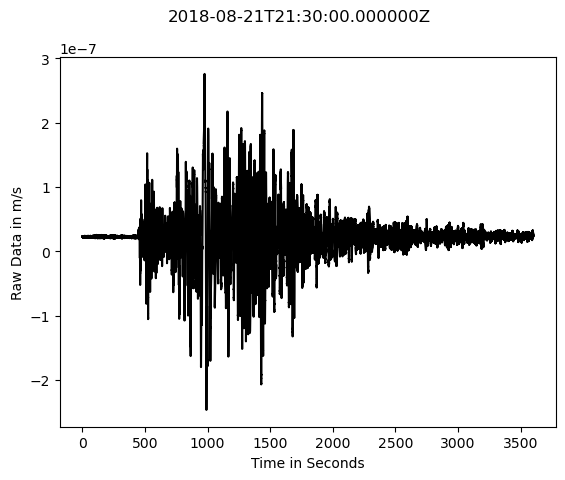

In [71]:
# copy trace to tr2
tr2=tr.copy()
t1=UTCDateTime(2018,8,21,21,30,0)
t2=UTCDateTime(2018,8,21,22,30,0)
tr2.trim(t1,t2)
tr2.data=tr2.data*factor # multiplies data values of tr2 by factor
t = np.arange(0, tr2.stats.npts / tr2.stats.sampling_rate, tr2.stats.delta) # creates time axis
#or t=tr2.times()
plt.subplot(111)
plt.plot(t, tr2, 'k')
plt.ylabel('Raw Data in m/s')
plt.xlabel('Time in Seconds')
plt.suptitle(tr2.stats.starttime)
plt.show()

# define start time: t1=...
# define end time: t2=...
# use tr2.trim(t1,t2) to trim the trace
# multiply data (tr2) by amplitude conversion factor
# construct new time axis
# now plot tr2
# add x and y-labels, incluse starttime as title
# don't forget to show the plot

Plot a spectrogram! Since your time series (tr2) is longer than above, you will need to adapt NFFT (use NFFT = 2048) and noverlap (use noverlap = 500). You will also need to adapt vmin (use vmin = -220) and vmax (use vmax = -130), because your data contains much smaller amplitude values after you multiplied it by the conversion factor (conversion to m/s). You might also want to adapt the part of the frequency axis that you display (show only frequencies up to 3 Hz). As above, include axes labels and a horizontal colorbar.

In [30]:
# Define NFFT, Fs, noverlap, vmin, vmax and figure first.
# Compute spectrogramn using plt.specgram()
# Add y-axis limits, axes labels, a colorbar and a colorbar label
# Show plot

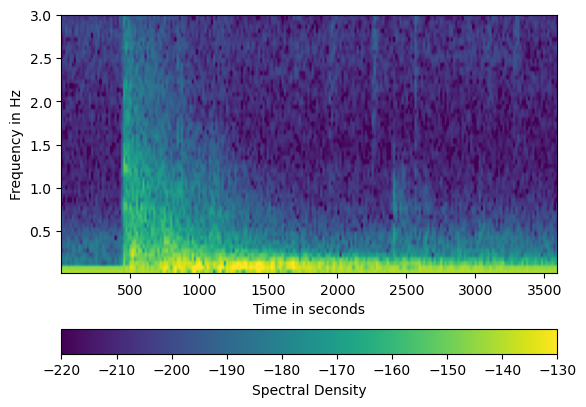

In [72]:
NFFT= 2048 #number of points in FFT, should be 2^n for integer n.
Fs=1.0/tr2.stats.delta # we compute this from dt, given as meta information of the trace
noverlap=500 # must be smaller than NFFT
vmin=-220 # value assigned to dark purple
vmax=-130 # value assigned to bright yellow
fig = plt.figure(1) # assigna a figure's name, in order to use it for the colorbar
Pxx, freqs, bins, im=plt.specgram(tr2, NFFT=NFFT, Fs=Fs, noverlap=noverlap,vmin=vmin,vmax=vmax) # this is the actual specgram function
plt.ylim(0.01,3) # change y-axis limits
plt.xlabel('Time in seconds') # add labels
plt.ylabel('Frequency in Hz') # add labels
cbar = fig.colorbar(im, orientation='horizontal') # add colorbar        
cbar.set_label('Spectral Density') # add colorbar label
plt.show() # show plot

Now we will filter the trace again. As above, copy the trace tr2 to tr3 first, then apply the filter to tr3. Which frequencies would you like to include in your passband?

In [73]:
# copy the trimmed tr2 to tr3
# bandpass filter tr3
# copy the trimmed tr2 to tr3
tr3=tr2.copy()
tr3.filter('bandpass',freqmin=0.2,freqmax=2, zerophase= 'True') # application of bandpass filter

GI.STG8..HHZ | 2018-08-21T21:30:00.000000Z - 2018-08-21T22:30:00.000000Z | 100.0 Hz, 360001 samples

Now we can plot both, unfiltered and filtered traces. Remember: you already multiplied tr2.data by the factor, so your amplitudes are displayed in m/s already. Look at different filters.

In [33]:
# Create time axis
# Define first subplot and plot unfiltered data, add y-label
# Define second subplot and plot filtered data, add x-label and y-label
# Add starttime as title
# Show plot

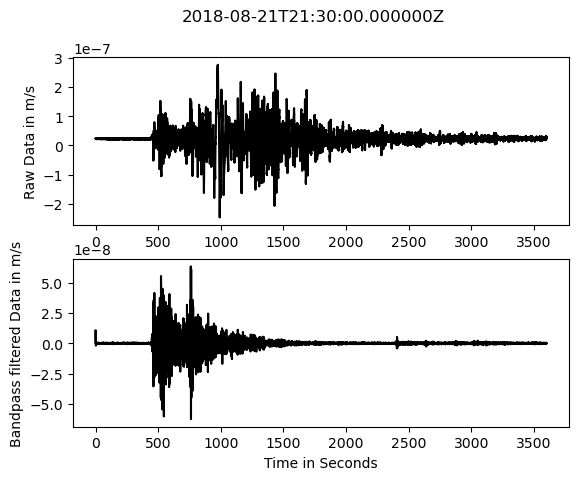

In [74]:
# plot both, tr2 and tr3, again, using m/s on the y-axis
t = np.arange(0, tr2.stats.npts / tr2.stats.sampling_rate, tr2.stats.delta) # creates time axis
#or t=tr2.times()
plt.subplot(211)
plt.plot(t, tr2, 'k')
plt.ylabel('Raw Data in m/s')
plt.subplot(212)
plt.plot(t, tr3, 'k')
plt.ylabel('Bandpass filtered Data in m/s')
plt.xlabel('Time in Seconds')
plt.suptitle(tr3.stats.starttime)
plt.show()

The seismogram was recorded in Guatemala, at Santiaguito volcano. The magnitude 7.3 earthquake occured in Venezuela, at 21:31:47 UTC, at a hypocentral depth of 147 km, and an epicentral distance of 28 degrees. 

Which phases would you expect in the seismogram?  Can you spot P, PP and S phases in the seismogram? They should appear at 340 seconds (P), 398 seconds (PP) and 613 seconds (S). Trimming your trace again might help you to recognize the phases. **For trimming, use the source time as start time.** 

Compare to a standard travel time curve. Below you find theoretical curves computed using the IASP91 Earth model for a source depth of 0 km (left) and 600 km (right).

<img src="Files/TTCurve.png" alt="drawing" width="550">

In [75]:
tr4=tr.copy()
t1=UTCDateTime(2018,8,21,21,31,47)
t2=UTCDateTime(2018,8,21,21,46,0)
tr4.trim(t1,t2)
tr4.data=tr4.data*factor # multiplies data values of tr2 by factor
#tr4.filter('bandpass',freqmin=0.01,freqmax=1, zerophase= 'True') # application of bandpass filter

Text(0.5, 0, 'travel time in minutes')

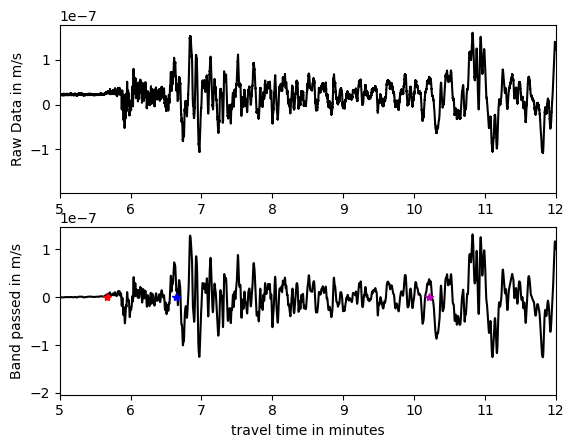

In [76]:
# plot both, tr2 and tr3, again, using m/s on the y-axis
t = np.arange(0, tr4.stats.npts / tr4.stats.sampling_rate, tr4.stats.delta)/60# creates time axis
#or t=tr2.times()
plt.subplot(211)
plt.plot(t, tr4, 'k')
plt.ylabel('Raw Data in m/s')
plt.xlim(5,12)
plt.subplot(212)
tr5=tr4.filter('bandpass',freqmin=0.01,freqmax=1, zerophase= 'True') # application of bandpass filter
plt.plot(t, tr5, 'k')
#They should appear at 340 seconds (P), 398 seconds (PP) and 613 seconds (S)
plt.plot(340/60,0,'r*')
plt.plot(398/60,0,'b*')
plt.plot(613/60,0,'m*')
plt.xlim(5,12)
plt.ylabel('Band passed in m/s')
plt.xlabel('travel time in minutes')

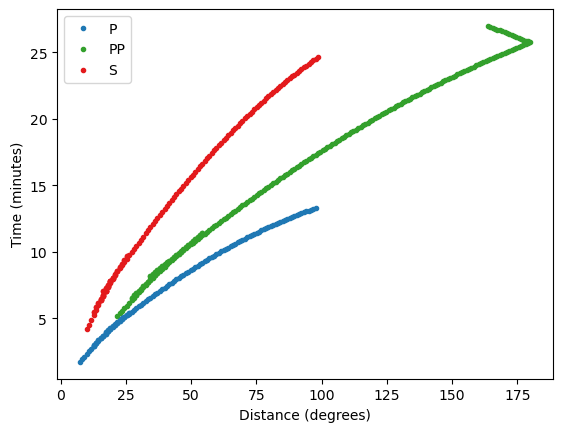

(0.0, 30.0)

In [77]:
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = plot_travel_times(source_depth=147, ax=ax, fig=fig,
                       phase_list=['P', 'PP', 'S'], npoints=200)
ax.plot(np.array([28,28]),np.array([0,25]),'k')
ax.set_xlim(0,30)

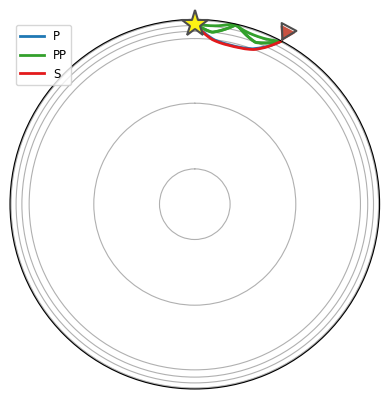

<PolarAxes: >

In [78]:
from obspy.taup import TauPyModel
model = TauPyModel(model='iasp91')
arrivals = model.get_ray_paths(147, 28, phase_list=['P','PP','S'])
arrivals.plot_rays(plot_type='spherical', phase_list=['P','PP','S'],
                   legend=True)

In [271]:
len(arrivals)

3

**Task 3: Teleseismic earthquake**

Apply the same analysis to the seismic records from 25 April 2015 (Julian day 115). This data was recorded at a different station. What is the station name? This station is also located very close at Santiaguito volcano, Guatemala. Read the data into a stream and plot all three traces as 24h-long seismogram.

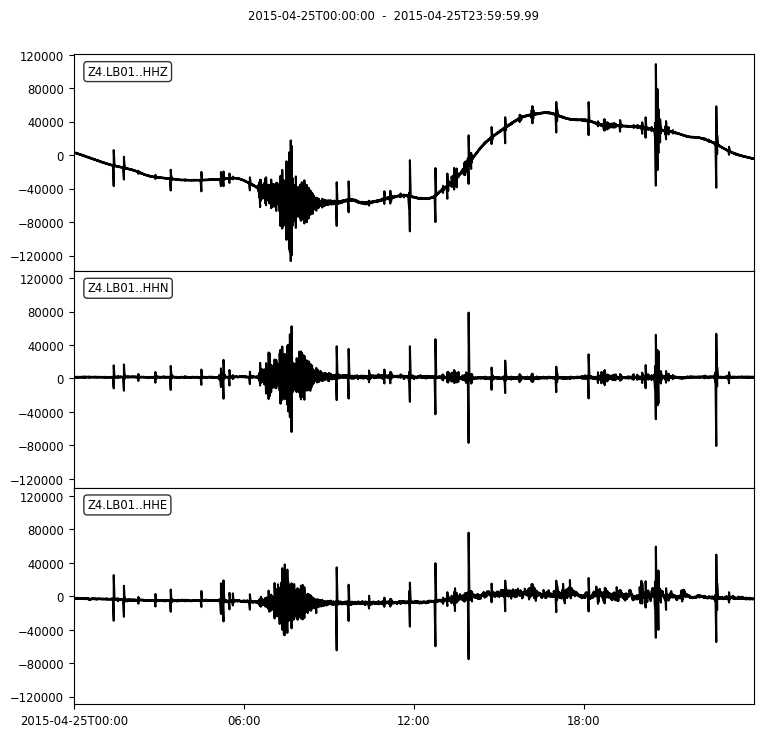

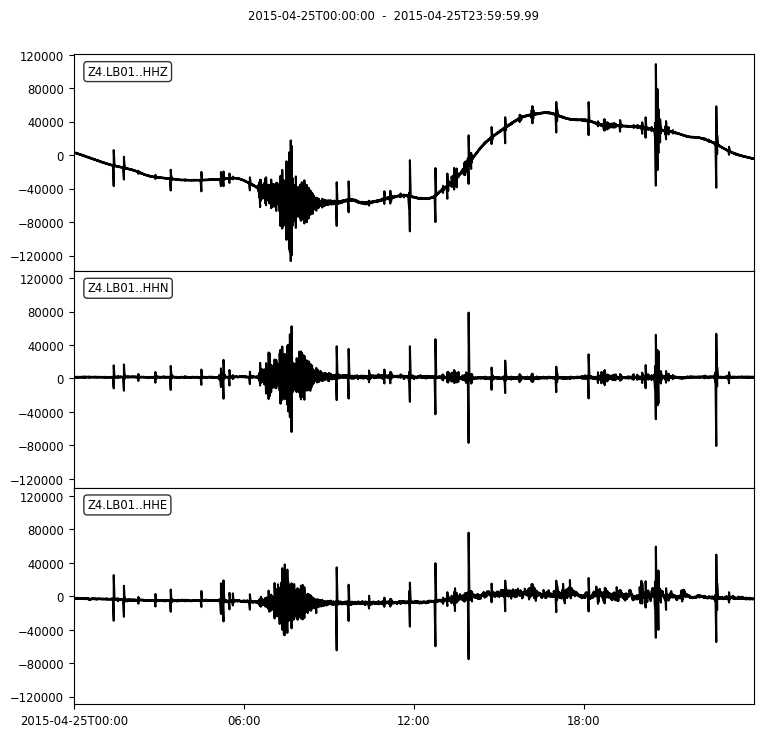

In [81]:
# read in data to stream and plot stream (will plot all three components)
st=read('Files/*2015.115')
st.plot()

The earthquake was a shallow (hypocentral depth = 13.4 km) magnitude 7.8 event, which occured at 06:11:26 UTC in Nepal (epicentral distance of 136 degrees). Select the vertical component, multiply the data by the same amplitude conversion factor as above (station uses same instrumentation as STG8) and trim the trace. Starttime should again be source time, and when trimming the data try to include the earthquake signal as complete as possible. Then filter the data to increase signal to noise ratio. Use a bandpass filter, and from what you know from task 2, choose which frequencies to use in your filter.

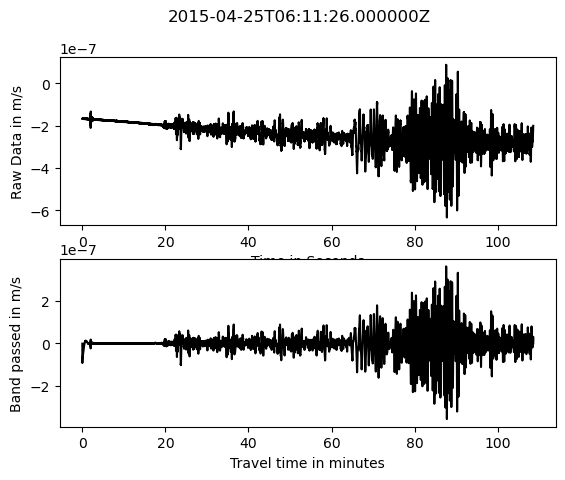

In [82]:
# assign vertical component in stream to tr
st=read('Files/*2015.115')
#st.plot()
tr=st.select(component='*Z')[0]
tr2=tr.copy()
t1=UTCDateTime(2015,4,25,6,11,26)
t2=UTCDateTime(2015,4,25,8,0,0)
tr2.trim(t1,t2)
tr2.data=tr2.data*factor # multiplies data values of tr2 by factor
t = np.arange(0, tr2.stats.npts / tr2.stats.sampling_rate, tr2.stats.delta)/60 # creates time axis
#or t=tr2.times()
plt.subplot(211)
plt.plot(t, tr2, 'k')
plt.ylabel('Raw Data in m/s')
plt.xlabel('Time in Seconds')
plt.suptitle(tr2.stats.starttime)
plt.subplot(212)
tr3=tr2.filter('bandpass',freqmin=0.01,freqmax=1, zerophase= 'True') # application of bandpass filter
plt.plot(t, tr3, 'k')
#They should appear at 340 seconds (P), 398 seconds (PP) and 613 seconds (S)
#plt.plot(340/60,0,'r*')
#plt.plot(398/60,0,'b*')
#plt.plot(613/60,0,'m*')
#plt.xlim(5,12)
plt.ylabel('Band passed in m/s')
plt.xlabel('Travel time in minutes')
plt.show()

# copy trace to tr2
# define start time: t1=...
# define end time: t2=...
# use tr2.trim(t1,t2) to trim the trace
# multiply data (tr2) by amplitude conversion factor
# construct time axis
# now plot tr2
# add x and y-labels, incluse starttime as title
# don't forget to show the plot

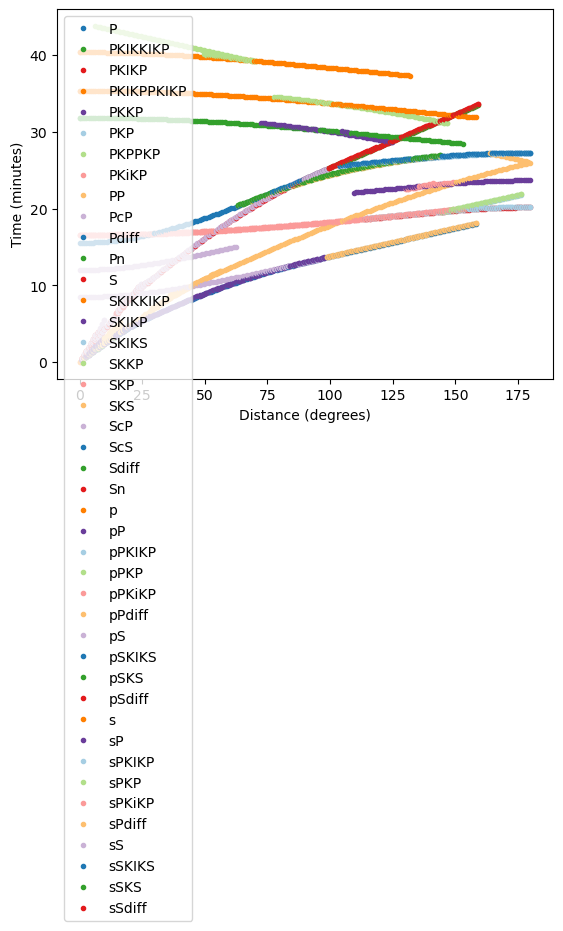

In [283]:
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = plot_travel_times(source_depth=8.2, ax=ax, fig=fig,
                     npoints=200)
#ax.plot(np.array([28,28]),np.array([0,25]),'k')
#ax.set_xlim(0,30)

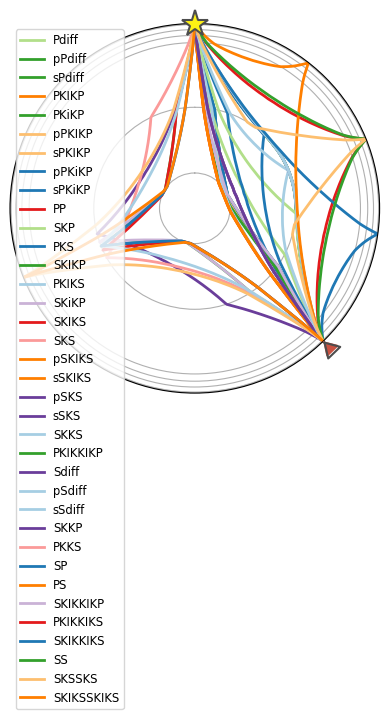

<PolarAxes: >

In [40]:
from obspy.taup import TauPyModel

model = TauPyModel(model='iasp91')
arrivals = model.get_ray_paths(8.2, 136 )
arrivals.plot_rays(plot_type='spherical',
                   legend=True)

In [41]:
phase1=arrivals[0]

In [42]:
phase1.name

'Pdiff'

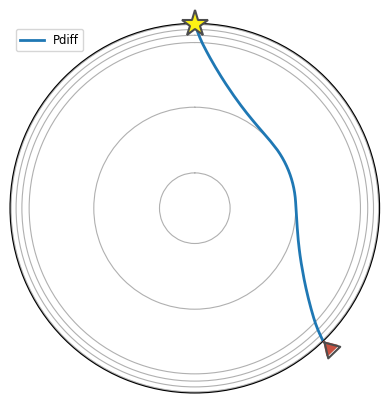

<PolarAxes: >

In [43]:
from obspy.taup import TauPyModel

model = TauPyModel(model='iasp91')
arrivals = model.get_ray_paths(8.2, 136, phase_list=['Pdiff'])
arrivals.plot_rays(plot_type='spherical',phase_list=['Pdiff'],
                   legend=True)

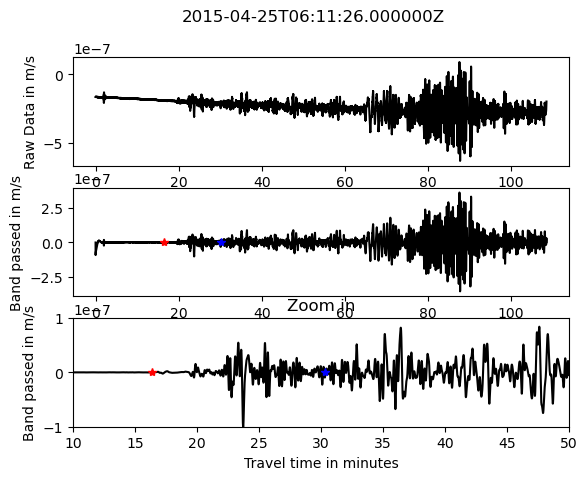

In [87]:
st=read('Files/*2015.115')
#st.plot()
tr=st.select(component='*Z')[0]

tr2=tr.copy()
t1=UTCDateTime(2015,4,25,6,11,26)
t2=UTCDateTime(2015,4,25,8,0,0)
tr2.trim(t1,t2)
tr2.data=tr2.data*factor # multiplies data values of tr2 by factor
t = np.arange(0, tr2.stats.npts / tr2.stats.sampling_rate, tr2.stats.delta)/60 # creates time axis
plt.subplot(311)
plt.plot(t, tr2, 'k')
plt.ylabel('Raw Data in m/s')
plt.xlabel('Time in Seconds')
plt.suptitle(tr2.stats.starttime)


plt.subplot(312)
arrivals = model.get_ray_paths(13.4, 136, phase_list=['Pdiff'])
time_pdiff=arrivals[0].time
arrivals = model.get_ray_paths(13.4, 136, phase_list=['Sdiff'])
time_sdiff=arrivals[0].time
tr3=tr2.filter('bandpass',freqmin=0.01,freqmax=1, zerophase= 'True') # application of bandpass filter
plt.plot(t, tr3, 'k')
plt.plot(time_pdiff/60,0,'r*')
plt.plot(time_sdiff/60,0,'b*')
#They should appear at 340 seconds (P), 398 seconds (PP) and 613 seconds (S)
#plt.plot(340/60,0,'r*')
#plt.plot(398/60,0,'b*')
#plt.plot(613/60,0,'m*')
#plt.ylim(-1e-7,1e-7)
plt.ylabel('Band passed in m/s')
plt.xlabel('Travel time in minutes')

plt.subplot(313)
arrivals = model.get_ray_paths(13.4, 136, phase_list=['Pdiff'])
time_pdiff=arrivals[0].time
arrivals = model.get_ray_paths(13.4, 136, phase_list=['Sdiff'])
time_sdiff=arrivals[0].time
tr3=tr2.filter('bandpass',freqmin=0.01,freqmax=0.1, zerophase= 'True') # application of bandpass filter
plt.plot(t, tr3, 'k')
plt.plot(time_pdiff/60,0,'r*')
plt.plot(time_sdiff/60,0,'b*')
#They should appear at 340 seconds (P), 398 seconds (PP) and 613 seconds (S)
#plt.plot(340/60,0,'r*')
#plt.plot(398/60,0,'b*')
#plt.plot(613/60,0,'m*')
plt.ylim(-1e-7,1e-7)
plt.xlim(10,50)
plt.ylabel('Band passed in m/s')
plt.xlabel('Travel time in minutes')
plt.title('Zoom in')
plt.show()

What is the first seismic phase that you would expect for this epicentral distance? Check with the global travel time curves above. Can you spot any other phases? 

**Task 4: Surprise earthquake**

In the Files folder you will also find data from 7 September 2018 (Julian Day 249). Can you detect local, regional or teleseismic events? You may support your analysis by checking the USGS or EMSC earthquake catalogs at

https://earthquake.usgs.gov/earthquakes/search/ and
https://www.emsc-csem.org/Earthquake/?filter=yes

In [24]:
# read in data to stream, print the stream, plot a dayplot, and continue your analysis as above...